# Daniel Wilczak

Assignment #6-1

# Asssignment

import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-04-13 22:51:10.049651: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 22:51:10.382746: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-13 22:51:10.382769: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-13 22:51:11.611375: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Mouting a drive

Load and split data, then check the number of data

In [4]:
dat=np.loadtxt('and.csv', delimiter=',', skiprows=1)
data_train=dat[:,:-1]
class_train=dat[:,-1]
print('data:', data_train.shape)
print('class:', class_train.shape)

FileNotFoundError: and.csv not found.

Model building and learning

In [2]:
model=Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy',
                                    metrics=['accuracy'])
fit_log=model.fit(data_train, class_train, epochs=1000, batch_size=1)

2023-04-13 22:52:40.611633: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-13 22:52:40.611685: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Fabric-of-Space-Time): /proc/driver/nvidia/version does not exist
2023-04-13 22:52:40.612185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'data_train' is not defined

Graph for accuracy

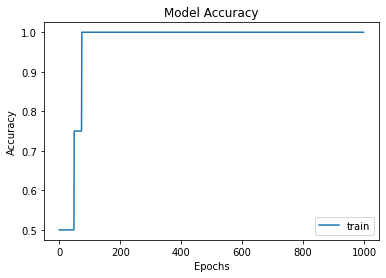

In [ ]:
plt.plot(fit_log.history['accuracy'], label='train')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Find the predicted value for the training data

In [ ]:
print(model.predict(data_train))

[[0.03699619]
 [0.21626174]
 [0.22386631]
 [0.6744498 ]]


# Optional

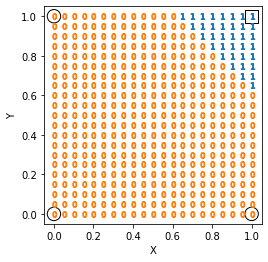

In [ ]:
# Prepare to draw a separating hyperplane: teaching signal
t1=data_train[class_train==1]
t0=data_train[class_train==0]
t1_x=t1[:,0]
t1_y=t1[:,1]
t0_x=t0[:,0]
t0_y=t0[:,1]

# Prepare to draw a separating hyperplane: grid points
g=np.loadtxt('/gdrive/My Drive/grid01_21x21.csv', delimiter=',')
pred_g=model.predict(g)[:, 0]
g1=g[pred_g>=0.5]
g0=g[pred_g<0.5]
g1_x=g1[:, 0]
g1_y=g1[:, 1]
g0_x=g0[:, 0]
g0_y=g0[:, 1]

# Draw a separating hyperplane
plt.scatter(t1_x,t1_y,marker='s',facecolors='none',edgecolors='black',s=180)
plt.scatter(t0_x,t0_y,marker='o',facecolors='none',edgecolors='black',s=180)
plt.scatter(g1_x,g1_y,marker='$1$')
plt.scatter(g0_x,g0_y,marker='$0$')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

